# OBTENCION DEL DATA SET
la obtencion de la data fue a travez del api de coinmarketcap, se hace un web scraping a los datos mas importantes de las criptomonedas y se guarda en un dataset.

In [ ]:
import requests
import csv
import os

#clave de api
api_key = 'f6372378-32fb-4f2b-89b6-aa48014f5e3e'

#link del endpoint
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'


params = {
    'start': '1500',  #inicio
    'limit': '3000',  #hasta que cripto leer
    'convert': 'USD'
}


headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': api_key
}


response = requests.get(url, headers=headers, params=params)


if response.status_code == 200:
    data = response.json()['data']


    csv_file = 'cryptocurrency_data.csv'


    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)


        writer.writerow(['Rank', 'Name', 'Symbol', 'Price (USD)', 'Market Cap', 'Volume (24h)'])

#datos que se obtinene del web scraping
        for crypto in data:
            rank = crypto['cmc_rank']
            name = crypto['name']
            symbol = crypto['symbol']
            price = crypto['quote']['USD']['price']
            market_cap = crypto['quote']['USD']['market_cap']
            volume_24h = crypto['quote']['USD']['volume_24h']

            writer.writerow([rank, name, symbol, price, market_cap, volume_24h])

    print(f"Datos guardados correctamente en {os.path.abspath(csv_file)}")
else:
    print(f"Error en la solicitud: {response.status_code}")


Datos guardados correctamente en /content/cryptocurrency_data.csv


# PREPROCESAMINENTO DEL DATASET
- aca se empieza con el preprocesamiento de los datos obtenidos


In [ ]:
#carga del dataset y muestreo de las primeras filas
import pandas as pd
df=pd.read_csv('cryptocurrency_data.csv')
print(df.head())

   Rank                      Name Symbol  Price (USD)    Market Cap  \
0  1500  Public Masterpiece Token    PMT     0.055709  2.306157e+06   
1  1501         Reality Metaverse    RMV     0.009212  2.302069e+06   
2  1502             NEST Protocol   NEST     0.000788  2.295190e+06   
3  1503                     Rubic    RBC     0.013858  2.290438e+06   
4  1504               Success Kid   SKID     0.026236  2.275806e+06   

   Volume (24h)  
0  2.047934e+05  
1  2.154848e+05  
2  1.588184e+05  
3  1.092145e+06  
4  1.695152e+05  


- informacion general del dataset y estadisticas descriptiva

In [ ]:
#informacion general del dataset
print(df.info())
#estadisticas descriptivas
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          3000 non-null   int64  
 1   Name          3000 non-null   object 
 2   Symbol        3000 non-null   object 
 3   Price (USD)   3000 non-null   float64
 4   Market Cap    3000 non-null   float64
 5   Volume (24h)  3000 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 140.8+ KB
None
              Rank   Price (USD)    Market Cap  Volume (24h)
count  3000.000000  3.000000e+03  3.000000e+03  3.000000e+03
mean   2999.500000  1.214216e+02  2.159272e+05  5.841589e+05
std     866.169729  3.934262e+03  4.653661e+05  9.261624e+06
min    1500.000000  5.593808e-15  0.000000e+00  0.000000e+00
25%    2249.750000  3.267928e-04  0.000000e+00  1.140200e+04
50%    2999.500000  3.684552e-03  0.000000e+00  5.171950e+04
75%    3749.250000  3.963239e-02  1.524818e+05  1.9031

- verificacion de datos nulos o vacios

In [ ]:
#verificar si tenemos datos nulos o vacios
print(df.isnull().sum())

Rank            0
Name            0
Symbol          0
Price (USD)     0
Market Cap      0
Volume (24h)    0
dtype: int64


- verificacion y eliminacion de duplicados

In [ ]:
#verificar y eliminar filas duplicadas
df=df.drop_duplicates()

manejo de valores atipicos

In [ ]:
import numpy as np
# manejo de valores atipicos
def normalizar_ouliners(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  RIC = Q3 - Q1

  lower_bound = Q1 - 1.5 * RIC
  upper_bound = Q3 + 1.5 * RIC

  # Winsorización (ajustar outliers a los límites)
  column = np.where(column < lower_bound, lower_bound, column)
  column = np.where(column > upper_bound, upper_bound, column)

  return column

- mostramos los outliners a travez de boxplot

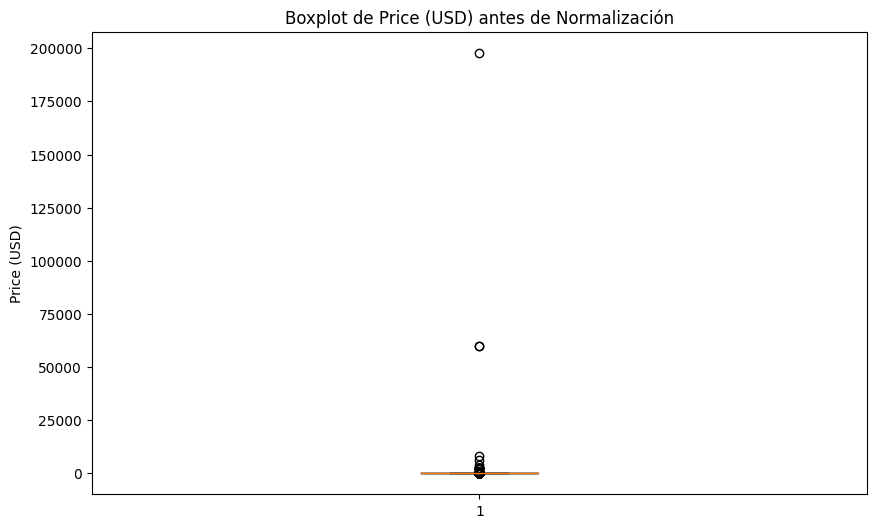

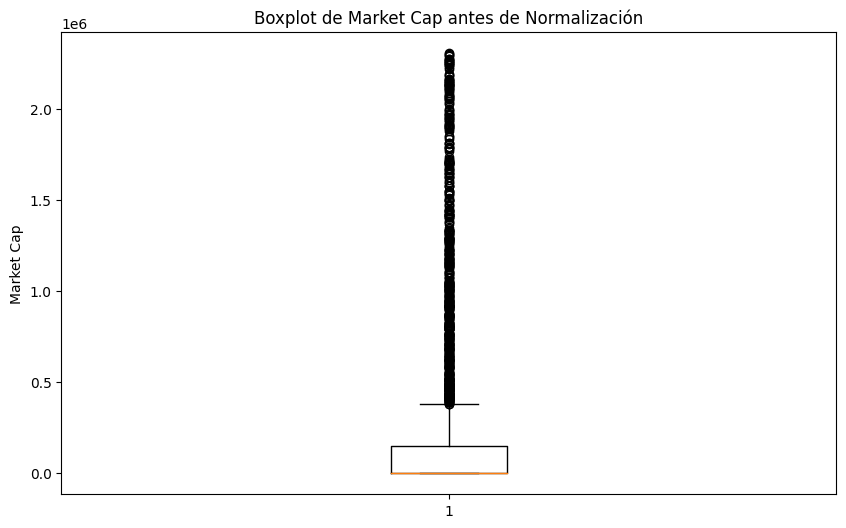

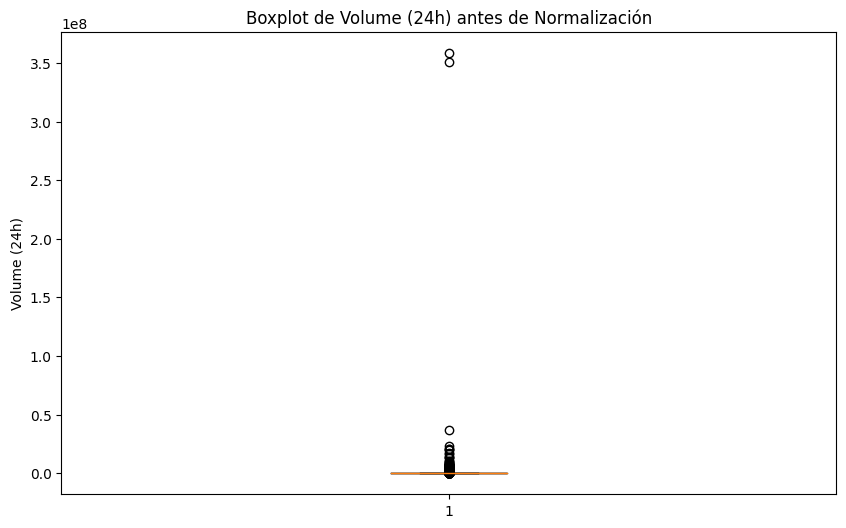

In [ ]:
import matplotlib.pyplot as plt
#MOSTRAR LOS OUTLINERS
for col in ['Price (USD)', 'Market Cap', 'Volume (24h)']:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[col])
    plt.title(f'Boxplot de {col} antes de Normalización')
    plt.ylabel(col)
    plt.show()

- empieza la normalizacion de valores atipicos

In [ ]:
#normalizar outliners
for col in ['Price (USD)', 'Market Cap', 'Volume (24h)']:
    df[col] = normalizar_ouliners(df[col])

- vizualizamos otra vez los datos atipicos

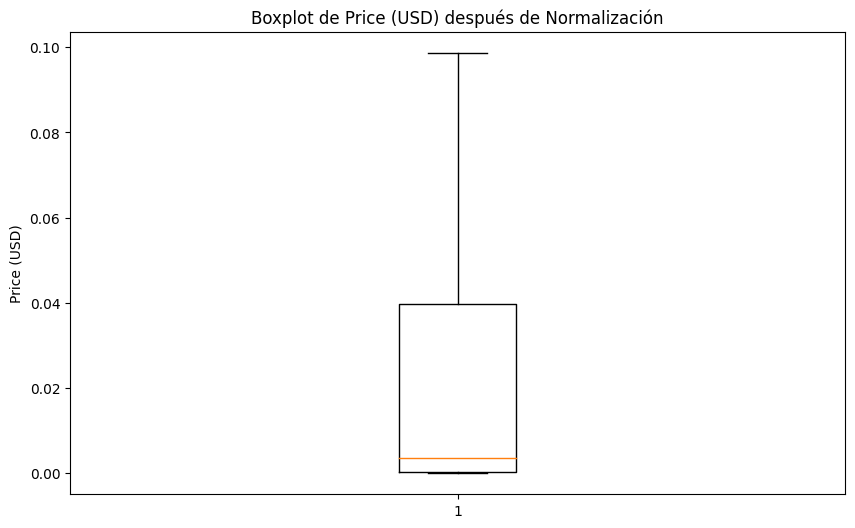

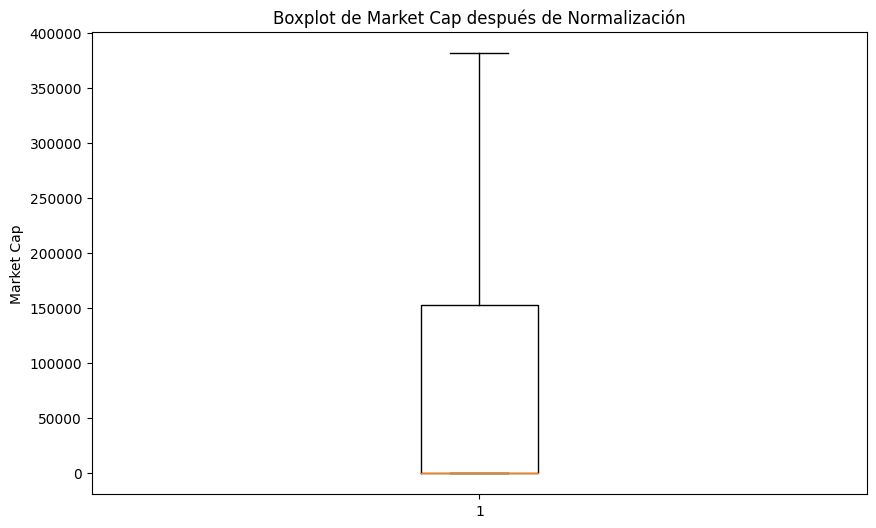

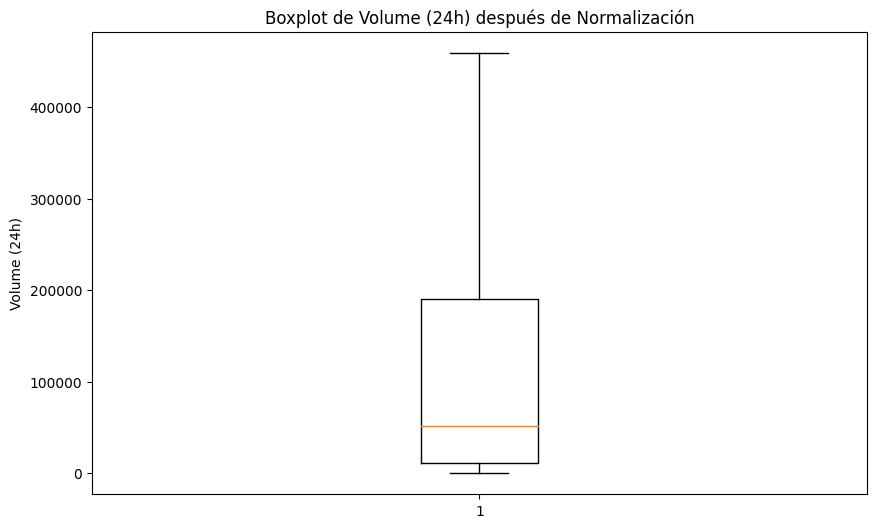

In [ ]:
#visualizar los datos normalizados
for col in ['Price (USD)', 'Market Cap', 'Volume (24h)']:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[col])
    plt.title(f'Boxplot de {col} después de Normalización')
    plt.ylabel(col)
    plt.show()

- guardamos el dataset normalizado en un csv nuevo

In [ ]:
df.to_csv('crypto_dataset_normalizado.csv', index=False)
print("Dataset normalizado guardado como 'crypto_dataset_normalizado.csv'.")

Dataset normalizado guardado como 'crypto_dataset_normalizado.csv'.


#Grafos
- empezamos con la creacion del grafo con el nuevo dataset ya normalizado

In [ ]:
csv_file = 'crypto_dataset_normalizado.csv'
dfnor = pd.read_csv(csv_file)

- creamos un grafo con el dataset que relaciona las criptomonedas que tengan un rango similar en la capitalizacion de mercado

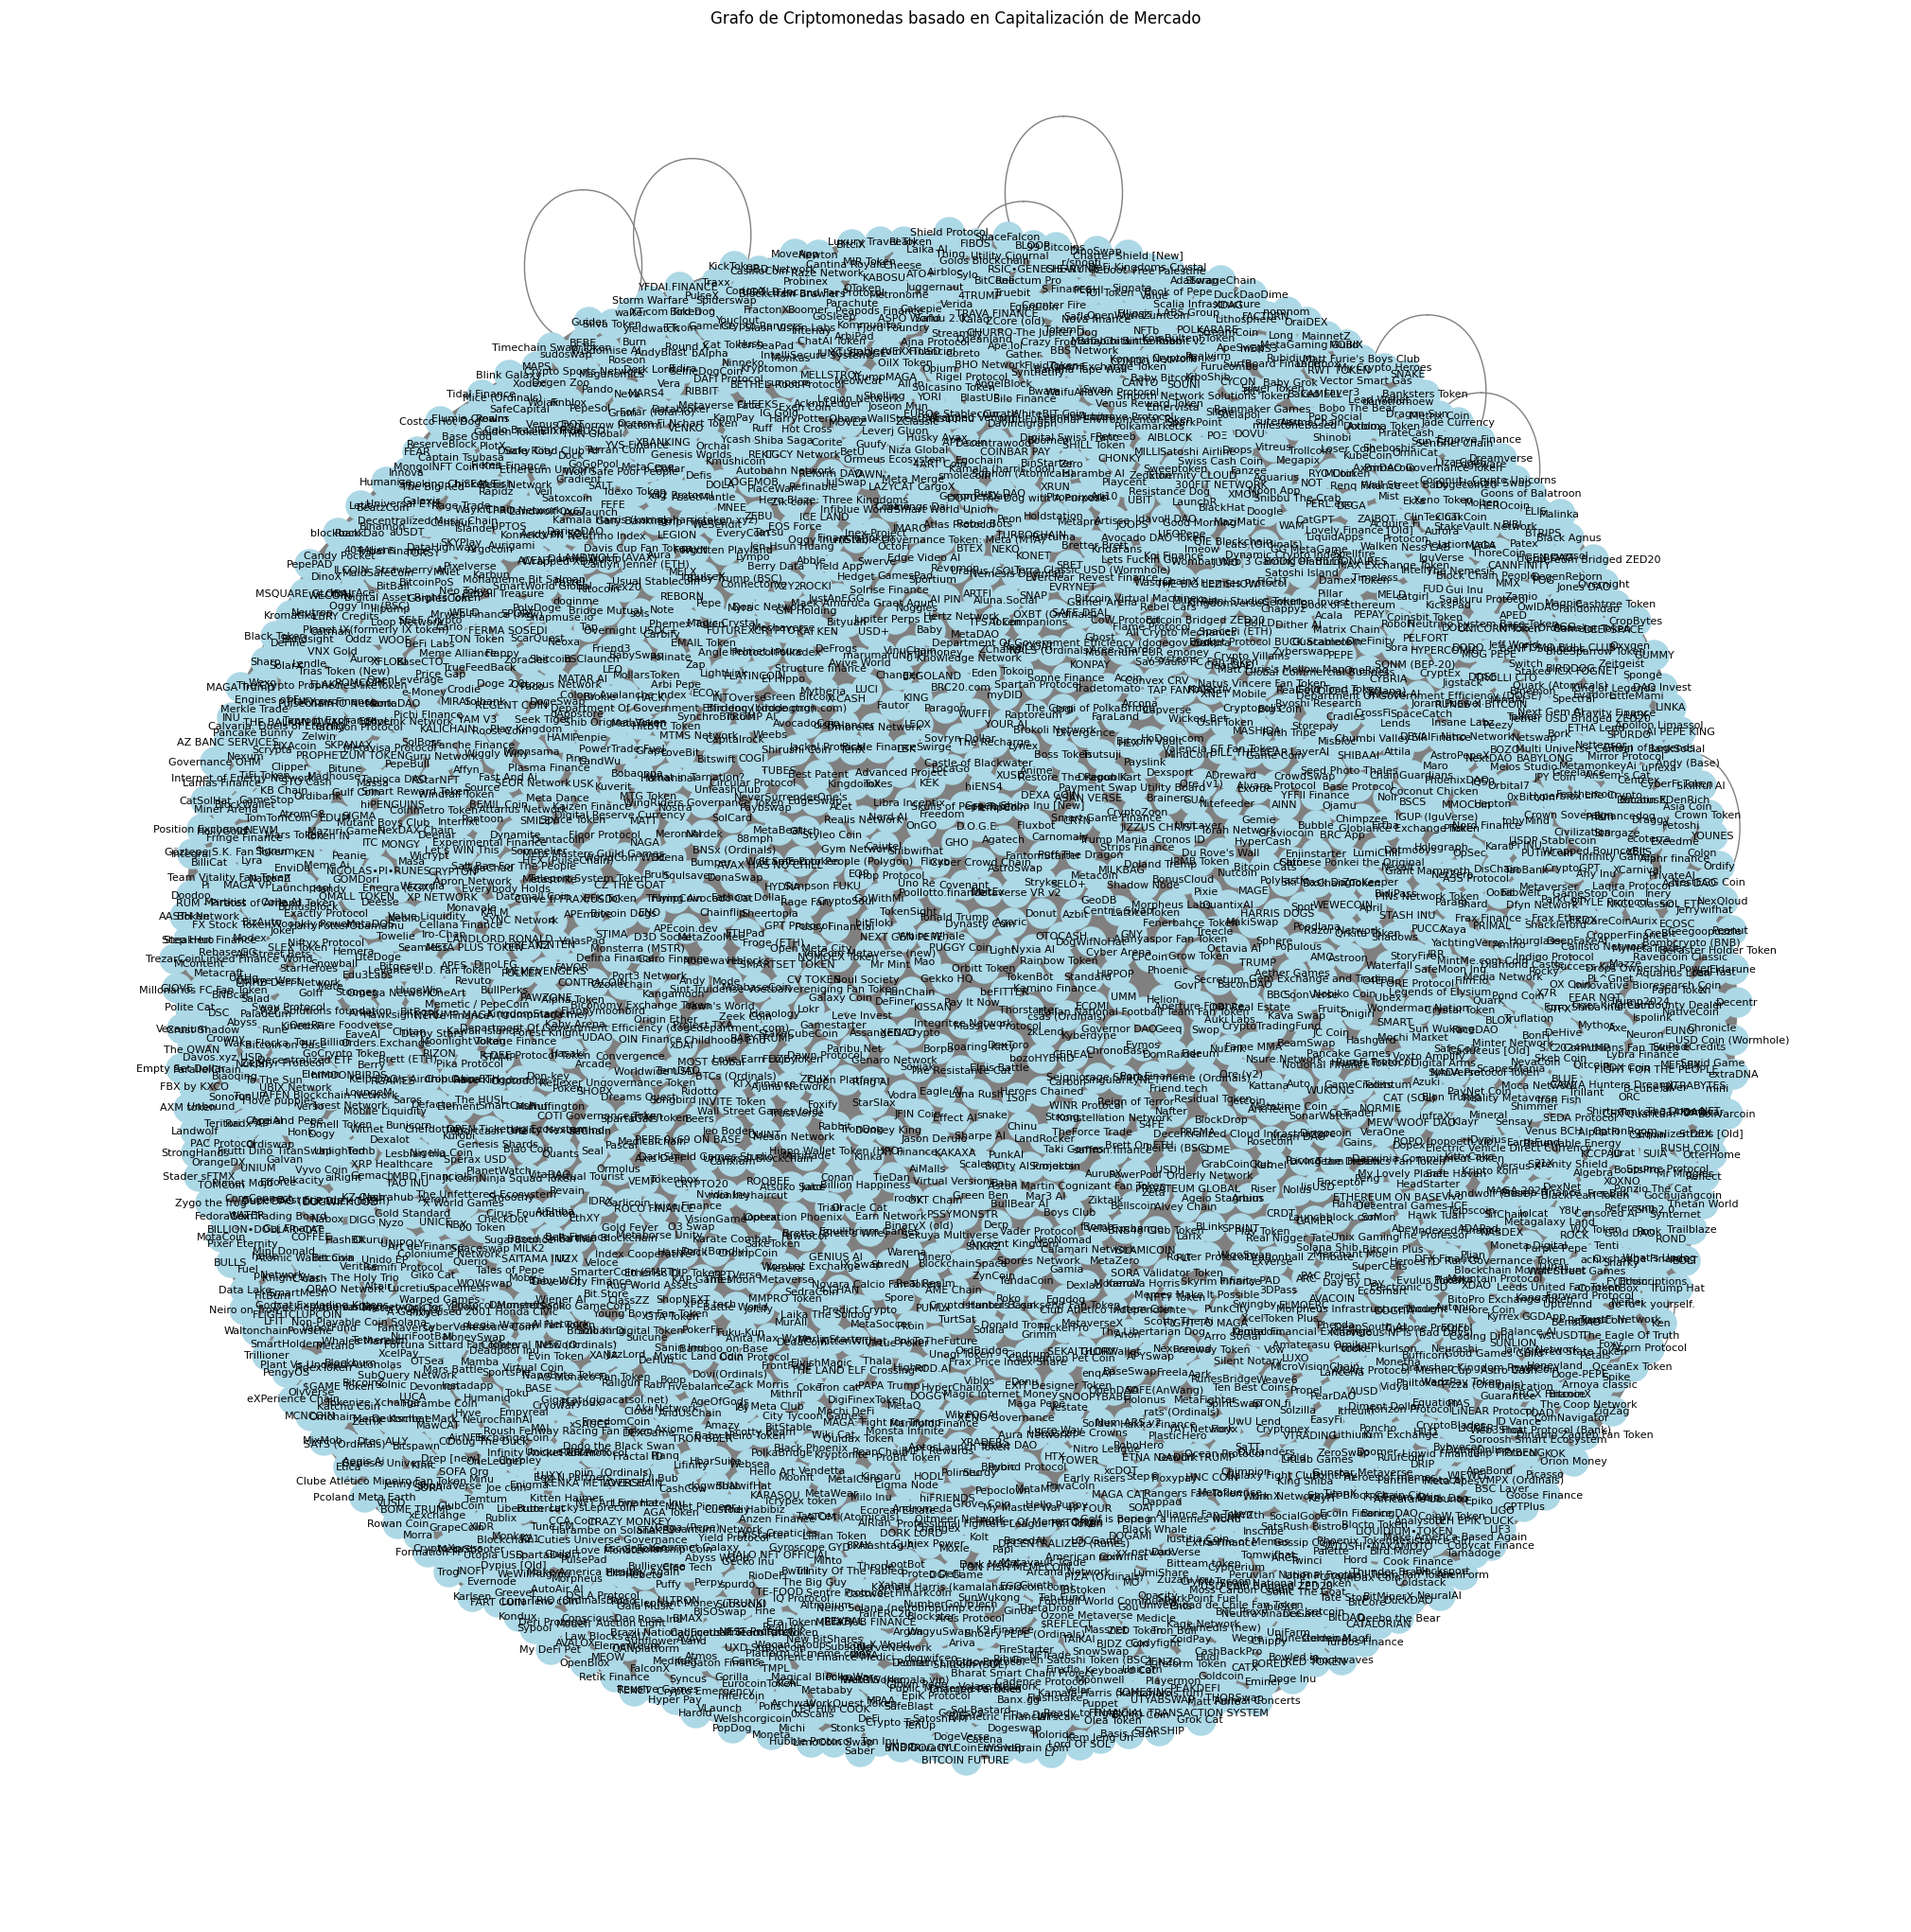

In [ ]:
import networkx as nx

G = nx.Graph()

#agrega nodos
for index, row in dfnor.iterrows():
    crypto_name = row['Name']
    G.add_node(crypto_name, rank=row['Rank'], market_cap=row['Market Cap'], volume=row['Volume (24h)'])

#agregar aristas (relaciones basadas en similitud en la capitalización de mercado)
for i, row_i in dfnor.iterrows():
    for j, row_j in dfnor.iterrows():
        if i != j:
            #relaciona criptomonedas si su capitalización de mercado está dentro de un rango similar
            if abs(row_i['Market Cap'] - row_j['Market Cap']) < 1e10:  #rango de 10 mil millones de USD
                G.add_edge(row_i['Name'], row_j['Name'])

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.90, iterations=100)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, node_color='lightblue', edge_color='gray')
plt.title('Grafo de Criptomonedas basado en Capitalización de Mercado')
plt.show()

- tamaños reescalados
- para este otro ejemplo utilizamos el market cap y el volumen

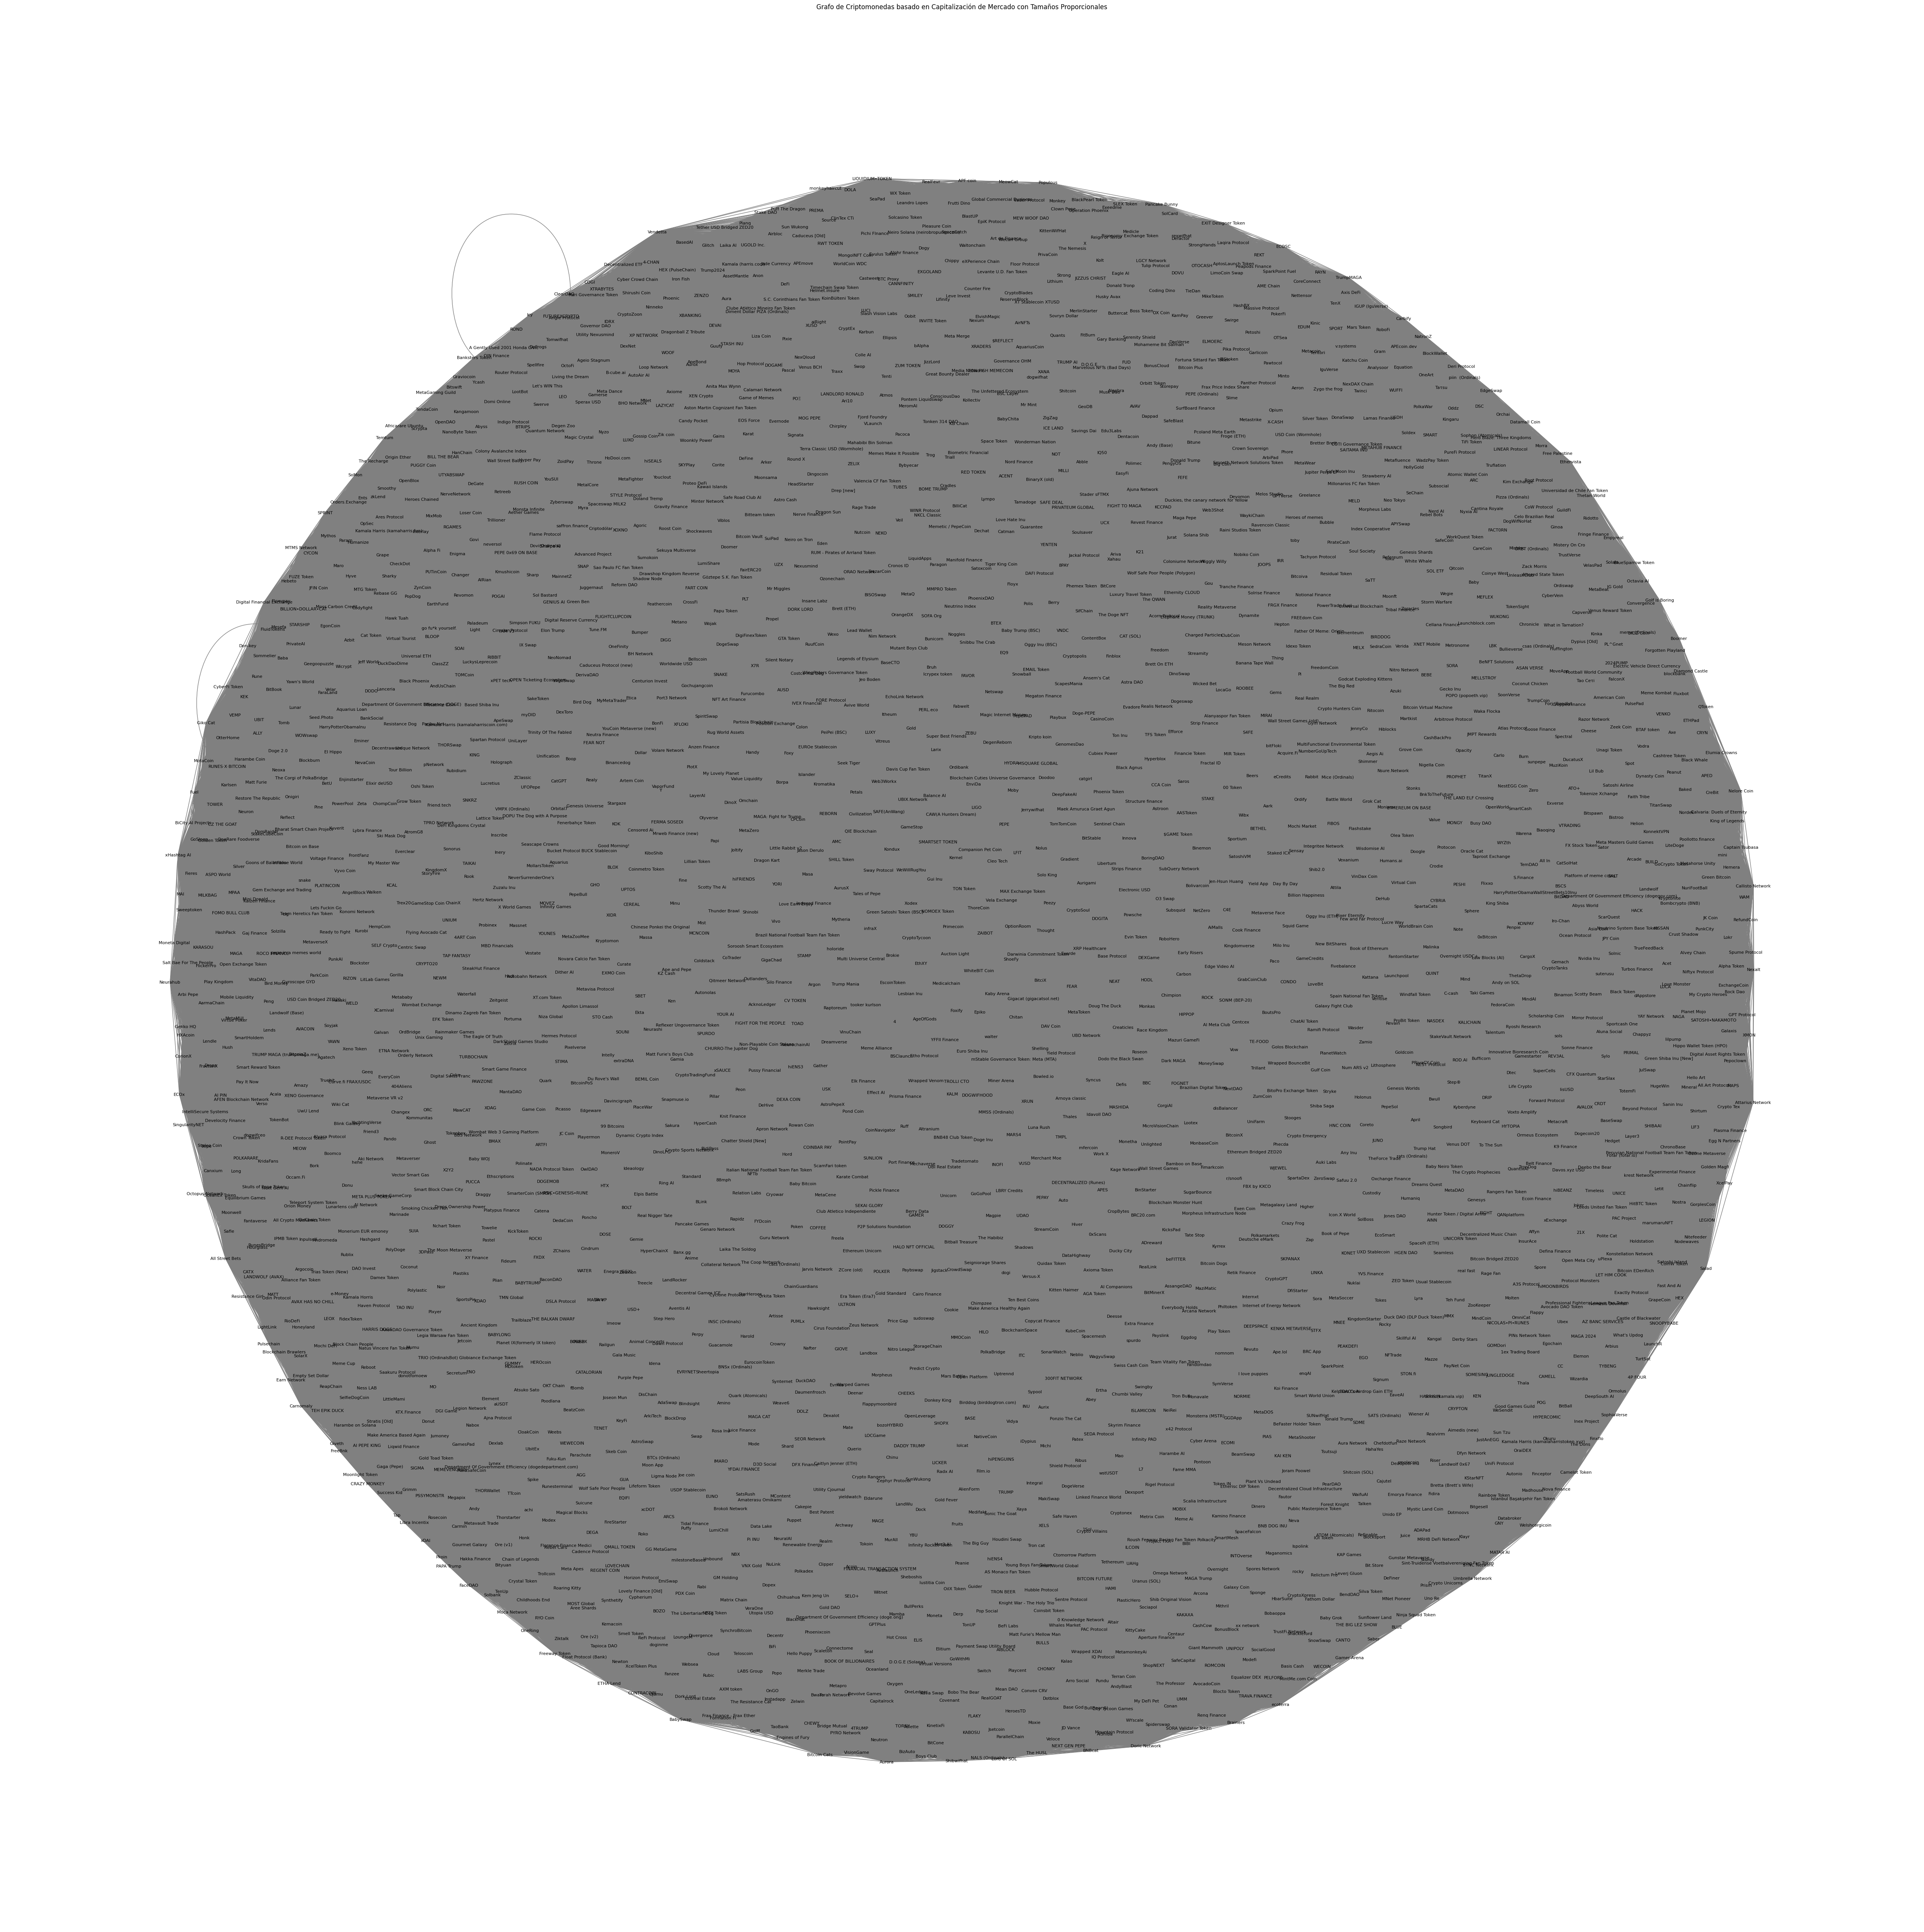

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

#agrega nodos con atributos: Rank, Market Cap y Volume (24h)
for index, row in dfnor.iterrows():
    crypto_name = row['Name']
    G.add_node(crypto_name, rank=row['Rank'], market_cap=row['Market Cap'], volume=row['Volume (24h)'])

for i, row_i in dfnor.iterrows():
    for j, row_j in dfnor.iterrows():
        if i != j:
            if abs(row_i['Market Cap'] - row_j['Market Cap']) < 1e10:  #rango de 10 mil millones de USD
                G.add_edge(row_i['Name'], row_j['Name'])

#extrae los tamaños de los nodos en función de Market Cap
#se escala el tamaño para que sea más manejable (ajusta la escala dividiendo por un factor)
node_sizes = [G.nodes[node]['market_cap'] / 1e9 for node in G]  #escala por un factor

plt.figure(figsize=(50, 50))
pos = nx.spring_layout(G, k=0.50, iterations=60)
nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=8, node_color='lightblue', edge_color='gray')

plt.title('Grafo de Criptomonedas basado en Capitalización de Mercado con Tamaños Proporcionales')
plt.show()